In [3]:
import matplotlib.pyplot as plt
import geopandas as gp
import numpy as np
import pandas as pd
from pandas import DataFrame
from matplotlib import pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

In [2]:
villages_shp = gp.read_file('VILLAGE_MOI.shp',encoding='utf-8')

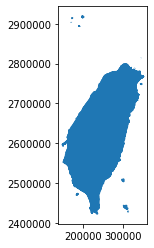

In [3]:
fig, ax = plt.subplots(1,1)
villages_shp.plot(ax=ax)
villages_shp.boundary.plot(ax=ax)
fig.savefig('Taiwan.png')

In [9]:
import json

with open('../data/acc3_20200214224048.json') as f:
    data=json.load(f)
    c=data['cwbopendata']['dataset']['contents']['content']

    
    d=c.split(',')
    e=np.array(d).astype('float')

In [21]:
f=np.split(e, 921, axis=0)


In [22]:
a=pd.DataFrame(f)
#a=np.random.randn(921,881)
a

,0,1,2,3,4,5,6,7,8,9,...,871,872,873,874,875,876,877,878,879,880
0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
4,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
917,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
918,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
919,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


In [24]:
a.replace(-999.0, 0.0, inplace=True)
a.replace(-99.0, 0.0, inplace=True)

In [51]:
#basic setting
start_point=[115.0,18.0] #Bottom left corner start
point_dis=0.0125 # the distance between two points
grid_size=[921,881]


In [46]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
m = Basemap(projection='cyl', llcrnrlat = 15.0,llcrnrlon = 115.0, urcrnrlat = 26.5125,
            urcrnrlon = 126.0125)
aaaa= m.readshapefile('VILLAGE_MOI', name='VILLAGE_MOI', drawbounds=True, ax=ax, default_encoding='utf-8')
fig, ax = plt.subplots(1, 1)
X, Y = np.meshgrid(np.linspace(115,126.0125,881), np.linspace(15,26.5125,921))
cs = m.contourf(x=X, y=Y, data=a, ax=ax)

ValueError: shapefile must have lat/lon vertices  - it looks like this one has vertices
in map projection coordinates. You can convert the shapefile to geographic
coordinates using the shpproj utility from the shapelib tools
(http://shapelib.maptools.org/shapelib-tools.html)